# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [483]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import StackingRegressor

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# Load the dataframe from csv
data = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [3]:
# Check the shape of data
data.shape

(25480, 12)

<IPython.core.display.Javascript object>

In [4]:
# Check the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

In [6]:
# Checking the first 5 rows
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [40]:
# Checking the last 5 rows
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57000,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79000,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85000,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77000,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91000,Year,Y,Certified


<IPython.core.display.Javascript object>

In [39]:
# Select random 10 rows
data.sample(n=10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
16318,EZYV16319,Asia,Master's,N,N,3851,2000,Northeast,108.12000,Hour,Y,Denied
5997,EZYV5998,Europe,Bachelor's,Y,Y,3236,2000,West,69738.00000,Year,Y,Certified
14306,EZYV14307,Europe,High School,N,N,802,2000,Northeast,24821.87000,Year,Y,Denied
23357,EZYV23358,Europe,Doctorate,N,N,1942,1838,Northeast,58490.53000,Year,Y,Certified
4164,EZYV4165,Asia,Master's,Y,N,527,2007,Midwest,124870.32000,Year,Y,Certified
892,EZYV893,North America,Master's,Y,N,1177,1998,Northeast,40030.56000,Year,Y,Certified
4655,EZYV4656,Africa,Master's,Y,N,3100,1996,Northeast,59120.18000,Year,Y,Certified
17007,EZYV17008,Asia,High School,N,N,3327,1998,South,15811.55000,Year,Y,Certified
13403,EZYV13404,Asia,Bachelor's,N,N,4288,1995,Northeast,189.54540,Hour,Y,Denied
3727,EZYV3728,Asia,Bachelor's,Y,N,2540,2008,Northeast,105.15070,Hour,Y,Certified


<IPython.core.display.Javascript object>

In [38]:
# Check if there are NaN values in the data set
data.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

In [35]:
# Check if there are nulls in the data set
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

In [36]:
# Check for duplicated rows
data.duplicated().value_counts()

False    25480
dtype: int64

<IPython.core.display.Javascript object>

In [37]:
# Check if any case_id value is duplicated or unique
data["case_id"].duplicated().value_counts()

False    25480
Name: case_id, dtype: int64

<IPython.core.display.Javascript object>

In [43]:
# data.describe().T
pd.set_option("display.float_format", lambda x: "%.5f" % x)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.00000,5667.04321,22877.92885,-26.00000,1022.00000,2109.00000,3504.00000,602069.00000
yr_of_estab,25480.00000,1979.40993,42.36693,1800.00000,1976.00000,1997.00000,2005.00000,2016.00000
prevailing_wage,25480.00000,74455.81459,52815.94233,2.13670,34015.48000,70308.21000,107735.51250,319210.27000


<IPython.core.display.Javascript object>

In [44]:
# Convert the object data types to categorical
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = pd.Categorical(data[col])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.3 MB


<IPython.core.display.Javascript object>

In [42]:
# Statistical summary of categorical columns
data.describe(include=["category"]).T

,count,unique,top,freq
case_id,25480,25480,EZYV9999,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


<IPython.core.display.Javascript object>

### Summary of data checks

* The data set has 25480 rows and 12 columns. Out of the 12 columns, only 3 are of numeric types (2 int64 and a float 64 column)

* No column has null or NaN values. Similarly, there are no duplicate columns in the data set

* Looking at the first/ last 5 rows, most employees had previous job experience (14802) and were in full time jobs (25480) and most of them had their visas certified (17018). 

* Out of the total population of 25480, 22525 of them don't require job training

* Most employees had Bachelor's as their highest level of education. Out of the total, 10234 had Bachelor's degree. 

* The dominant unit_of_wage of wage was Yearly

* Asia was the dominant continent of origin of the employees with 16861 of them from the continent, while Northeast had the most number of employees

* The mean of number of employees per company was 5667, minimum was -26 while maximum was 602069

* Regarding the prevailing_wage, the mean was 74455.81459, minimum 2.1367 and maximum was 319210.27

* I converted all the object data type columns to categorical

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

#### Distribution of variables in the data set

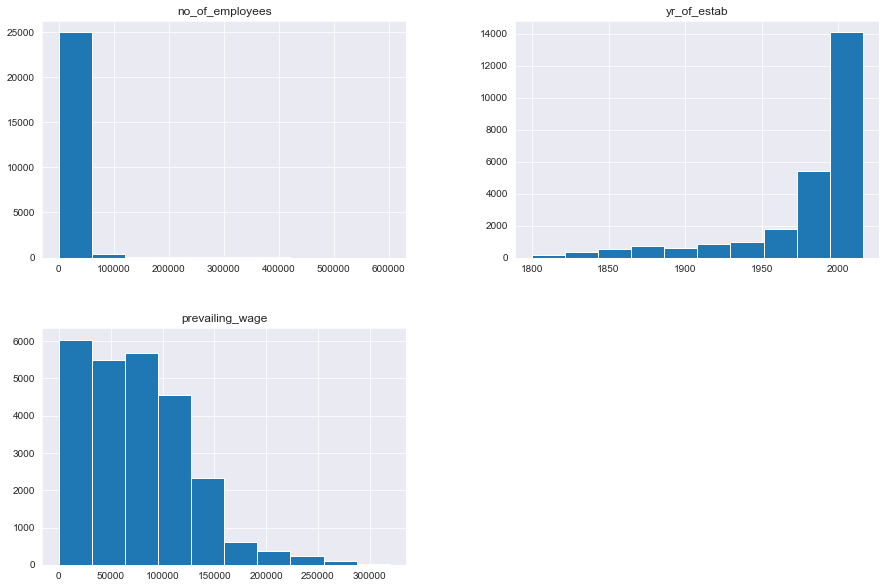

<IPython.core.display.Javascript object>

In [45]:
sns.set_style("darkgrid")
data.hist(figsize=(15, 10))
plt.show()

**Insights:**

* Most companies have less than 1000 employees
* Most companies were establishes after the year 2000, while some are as old as from 1800s
* Most employees earn between 0 and 150000, with a few earning above 150000

In [46]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Observations on no_of_employees

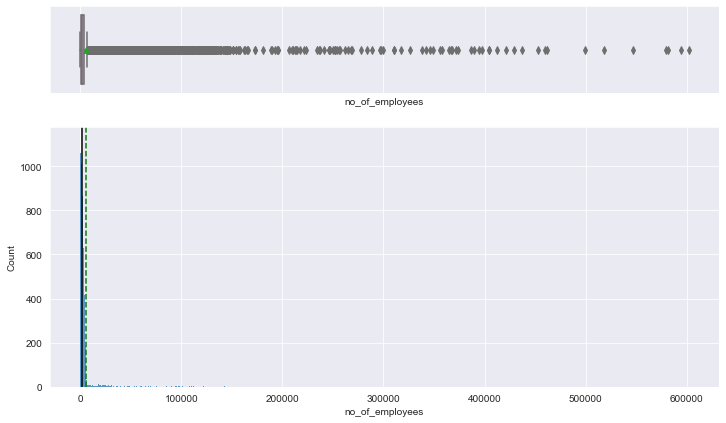

<IPython.core.display.Javascript object>

In [50]:
histogram_boxplot(data, "no_of_employees")

**Insights:**

* `no_of_employees` is left-skewed and has outliers on the right 

#### Observations on yr_of_estab

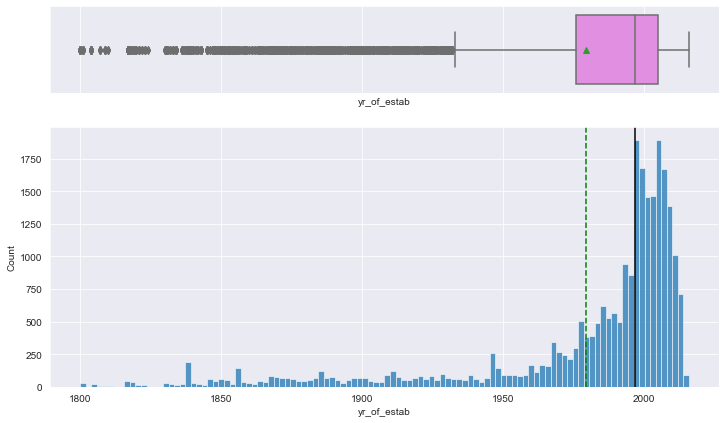

<IPython.core.display.Javascript object>

In [51]:
histogram_boxplot(data, "yr_of_estab")

**Insights:**

* `yr_of_estab` is left skewed and has outliers on the left side

#### Observations on prevailing_wage

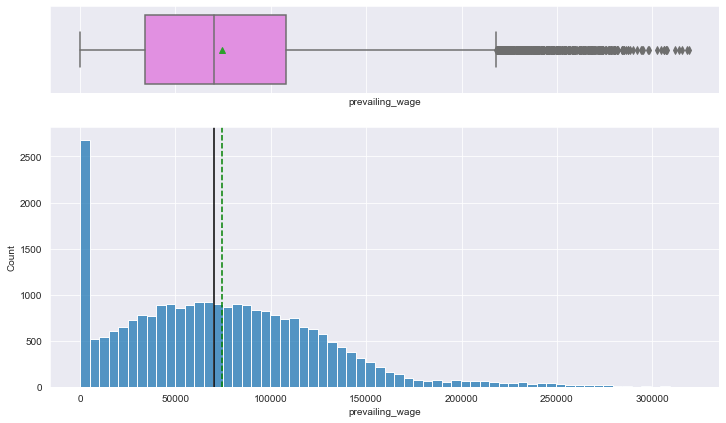

<IPython.core.display.Javascript object>

In [52]:
histogram_boxplot(data, "prevailing_wage")

* `prevailing_wage` is right-skewed with outliers on the right

In [47]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

#### Observations on continent

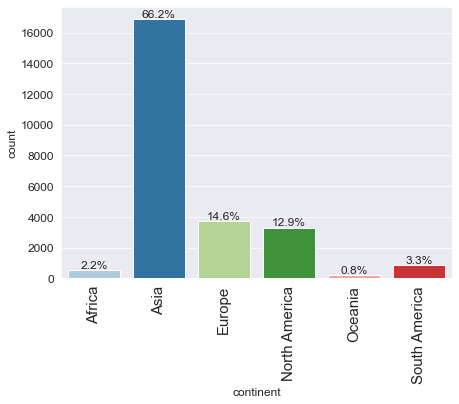

<IPython.core.display.Javascript object>

In [279]:
# data['continent'].value_counts().plot(kind='bar')
labeled_barplot(data, "continent", perc=True)

* Most employees are of Asian origin (66.2%), while Oceania had the least percentage (0.8%)

#### Observations on education_of_employee

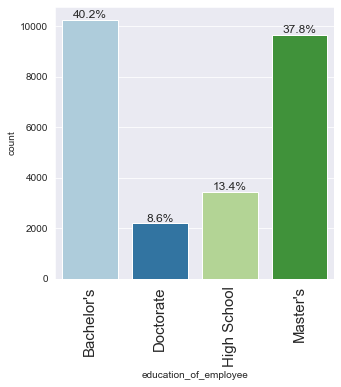

<IPython.core.display.Javascript object>

In [54]:
labeled_barplot(data, "education_of_employee", perc=True)

* Bachelor's was the dominant education level (40.2%), followed by Master's (37.8%) and High school (13.4%). Doctorate was the lowest at 8.6%

#### Observations on has_job_experience

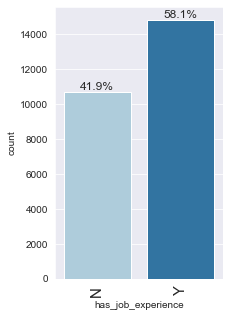

<IPython.core.display.Javascript object>

In [55]:
labeled_barplot(data, "has_job_experience", perc=True)

* Most employees has previous job experience (58.1%), while only 41.9% had no experience

#### Observations on requires_job_training

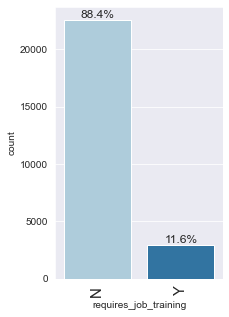

<IPython.core.display.Javascript object>

In [56]:
labeled_barplot(data, "requires_job_training", perc=True)

* Most employees didn't require job training (88.4%), with only 11.6% requiring training

#### Observations on region_of_employment

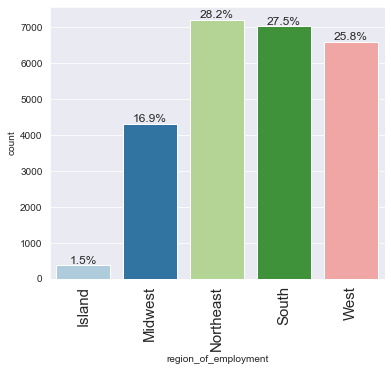

<IPython.core.display.Javascript object>

In [58]:
labeled_barplot(data, "region_of_employment", perc=True)

* Wrt region of employment, Northeast had the highest (28.2%), followed by South (27.5%), West (25.8%), Midwest (16.9%). Island was the least at 1.5%

#### Observations on unit_of_wage

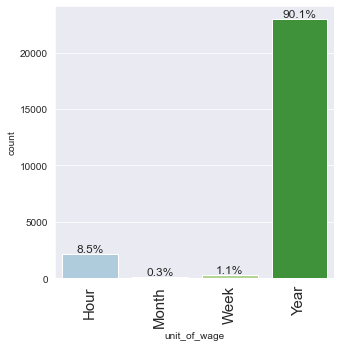

<IPython.core.display.Javascript object>

In [59]:
labeled_barplot(data, "unit_of_wage", perc=True)

* Most employees were paid on yearly basis (90.1%), while Monthly was the least at 0.3%

#### Observations on full_time_position

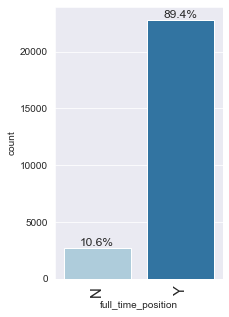

<IPython.core.display.Javascript object>

In [62]:
labeled_barplot(data, "full_time_position", perc=True)

* 89.4% of the employees were on full time positions, with only 10.6% on non-full-time positions

#### Observations on case_status

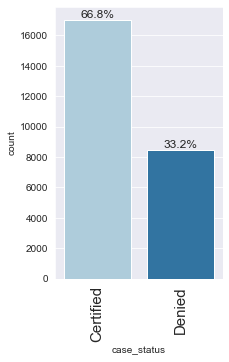

<IPython.core.display.Javascript object>

In [63]:
labeled_barplot(data, "case_status", perc=True)

* Overally, 66.8% of the cases, while 33.2% were denied

### Summary of Univariate Analysis

* `no_of_employees` is left-skewed and has outliers on the right 

* `yr_of_estab` is left aligned and has outliers on the left side

* `prevailing_wage` is right-skewed with outliers on the right

* Most employees are of Asian origin (66.2%), while Oceania had the least percentage (0.8%)

* Bachelor's was the dominant education level (40.2%), followed by Master's (37.8%) and High school (13.4%). Doctorate was the lowest at 8.6%

* Most employees has previous job experience (58.1%), while only 41.9% had no experience

* Most employees didn't require job training (88.4%), with only 11.6% requiring training

* Wrt region of employment, Northeast had the highest (28.2%), followed by South (27.5%), West (25.8%), Midwest (16.9%). Island was the least at 1.5%

* Most employees were paid on yearly basis (90.1%), while Monthly was the least at 0.3%

* 89.4% of the employees were on full time positions, with only 10.6% on non-full-time positions

*  66.8% of the cases, while 33.2% were denied

* 


### Bivariate Analysis

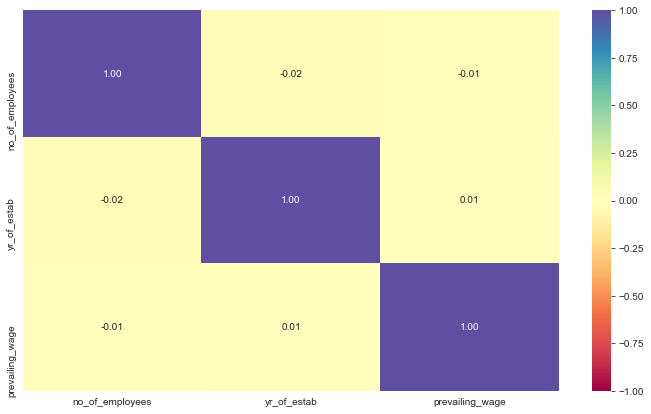

<IPython.core.display.Javascript object>

In [69]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There seems to be no strong correlations among numeric variables

### Stacked Barplots for the various variables

In [71]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [72]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

#### Continent vs case_status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


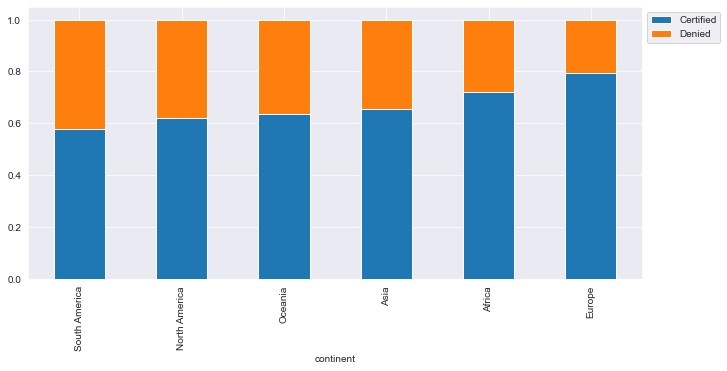

<IPython.core.display.Javascript object>

In [74]:
stacked_barplot(data, "continent", "case_status")

* Europe had the highest percentage of certified applications with approx. 20% denied while those from South America had the highest percentage of declined employees (approx. 42%)

#### education_of_employee vs case_status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


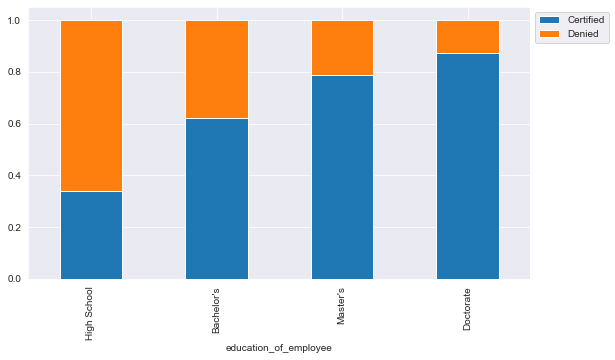

<IPython.core.display.Javascript object>

In [75]:
stacked_barplot(data, "education_of_employee", "case_status")

* High school leavers has the highest rate of decline while employees Doctorate had the least

#### has_job_experience vs case_status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


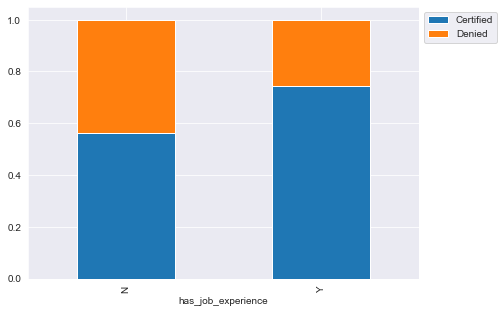

<IPython.core.display.Javascript object>

In [76]:
stacked_barplot(data, "has_job_experience", "case_status")

* Those with job experience had higher chances of being certified compared to those without

#### requires_job_training vs case_status

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


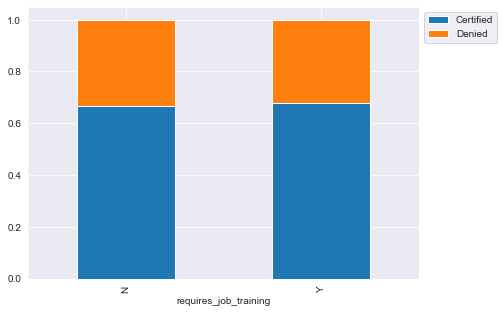

<IPython.core.display.Javascript object>

In [77]:
stacked_barplot(data, "requires_job_training", "case_status")

* Job training requirement seem to be a non-determinant since those who require and those who don't require job training abd equal chances of getting certified or declined

#### region_of_employment vs case_status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


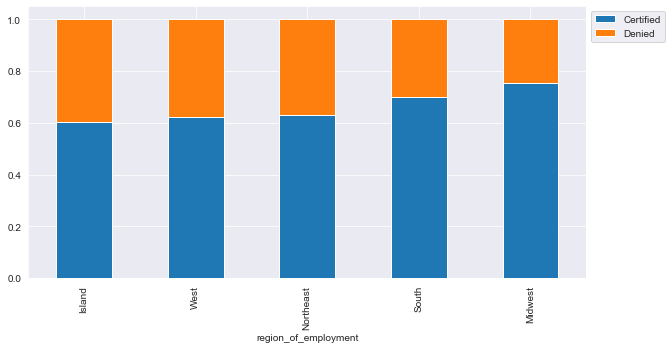

<IPython.core.display.Javascript object>

In [80]:
stacked_barplot(data, "region_of_employment", "case_status")

* Those from Island had the lowest chances of getting certified, while those from Midwest had the highest chances.

#### unit_of_wage vs case_status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


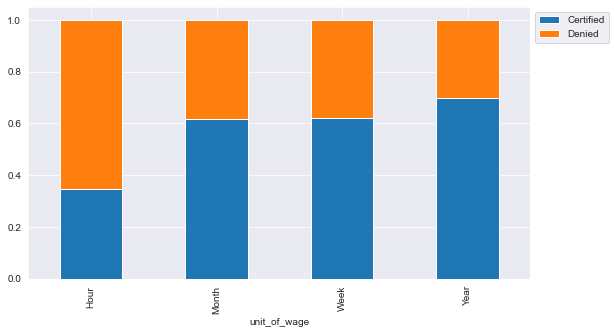

<IPython.core.display.Javascript object>

In [81]:
stacked_barplot(data, "unit_of_wage", "case_status")

* Majority of those certified had their wage paid on yearly basis, while those with hourly rates were the least

#### full_time_position vs case_status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


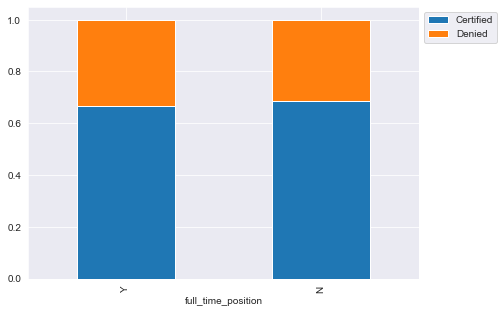

<IPython.core.display.Javascript object>

In [82]:
stacked_barplot(data, "full_time_position", "case_status")

* Those with full time positions and those with part-time had equal chances of getting cdrtified. 

#### yr_of_estab vs case_status

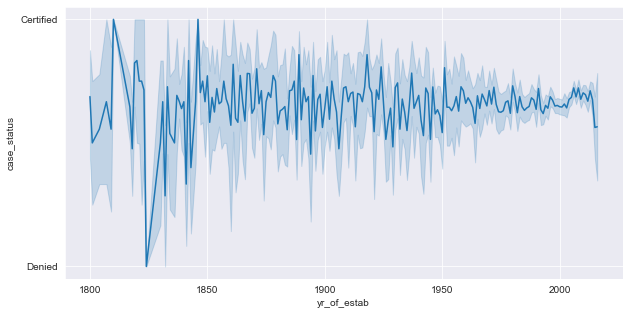

<IPython.core.display.Javascript object>

In [86]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="yr_of_estab", y="case_status")
plt.show()

* Generally, those who applied to older companies had better chances of being certified

#### Education levels of employees per region


In [151]:
edu_regions = pd.crosstab(
    data["region_of_employment"], data["education_of_employee"], margins=False
)

<IPython.core.display.Javascript object>

In [111]:
edu_regions

education_of_employee,Bachelor's,Doctorate,High School,Master's
region_of_employment,,,,
Island,129,25,60,161
Midwest,1315,256,736,2000
Northeast,2874,656,905,2760
South,2991,541,934,2551
West,2925,714,785,2162


<IPython.core.display.Javascript object>

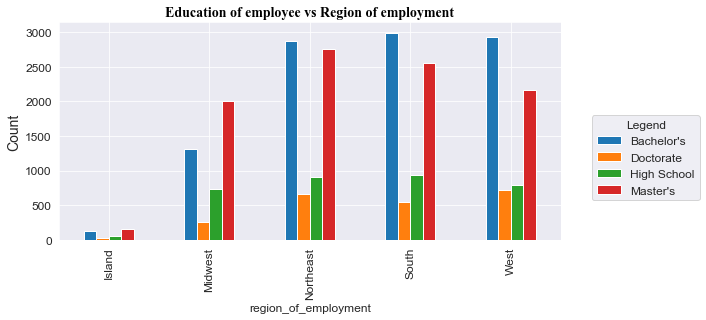

<IPython.core.display.Javascript object>

In [548]:
# edu_regions.plot(kind="bar", stacked=True, rot=0)
plt.rc("font", size=12)
plt.rcParams["figure.figsize"] = (9, 4)

edu_regions.plot(kind="bar")
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.title(
    "Education of employee vs Region of employment",
    fontsize=14,
    fontweight="bold",
    # fontname="Times New Roman"|cursive|cursive|sans|sans-serif|fantasy|serif
    fontname="Times New Roman",
    color="black",
)
plt.xticks(rotation=90)

plt.legend(title="Legend", bbox_to_anchor=(1.05, 0.6), loc="upper left", fontsize=12)

#### unit of wage against education level

* People with differently levels of education are paid differently, for example, less educated people have lower chances of securing salaried jobs, and therefore settle for manual jobs which are paid in terms of hours worked. Let's examine is there is any insights on this from the data set

In [112]:
wage_edu = pd.crosstab(
    data["education_of_employee"], data["unit_of_wage"], margins=False
)

wage_edu

unit_of_wage,Hour,Month,Week,Year
education_of_employee,,,,
Bachelor's,981,41,126,9086
Doctorate,96,5,8,2083
High School,395,13,32,2980
Master's,685,30,106,8813


<IPython.core.display.Javascript object>

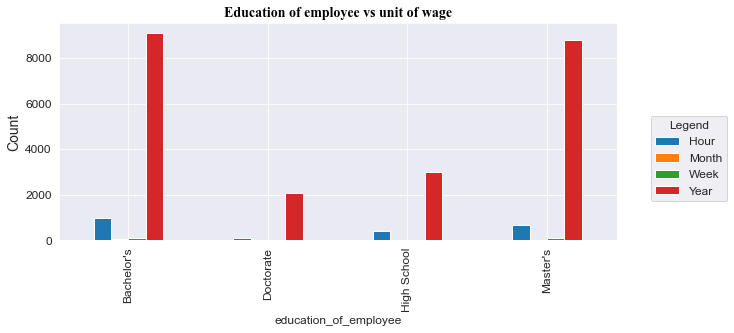

<IPython.core.display.Javascript object>

In [549]:
plt.rc("font", size=12)
plt.rcParams["figure.figsize"] = (10, 4)
barplot = wage_edu.plot.bar(rot=90)
plt.ylabel("Count", fontsize=14)
plt.title(
    "Education of employee vs unit of wage",
    fontsize=14,
    fontweight="bold",
    fontname="Times New Roman",
    color="black",
)
plt.xticks(rotation=90)

plt.legend(title="Legend", bbox_to_anchor=(1.05, 0.6), loc="upper left", fontsize=12)

#### Education level vs need for job training

* I want to see if a particular level of education requires further job training than the rest

In [114]:
job_ex_education = pd.crosstab(data.education_of_employee, data.has_job_experience)
job_ex_education

has_job_experience,N,Y
education_of_employee,,
Bachelor's,4348,5886
Doctorate,941,1251
High School,1396,2024
Master's,3993,5641


<IPython.core.display.Javascript object>

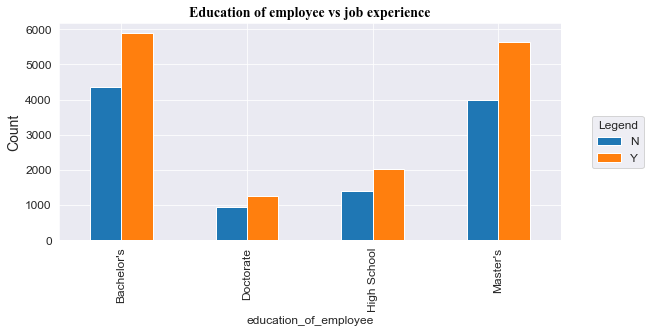

<IPython.core.display.Javascript object>

In [550]:
plt.rc("font", size=12)
plt.rcParams["figure.figsize"] = (9, 4)
barplot = job_ex_education.plot.bar(rot=90)
plt.ylabel("Count", fontsize=14)
plt.title(
    "Education of employee vs job experience",
    fontsize=14,
    fontweight="bold",
    fontname="Times New Roman",
    color="black",
)
plt.xticks(rotation=90)

plt.legend(title="Legend", bbox_to_anchor=(1.05, 0.6), loc="upper left", fontsize=12)

#### education_of_employee vs full_time_position

* Is there any correlation between full-time position and the level of education? Let me cross-tabulate the two and plot to see if there is any correlation

In [154]:
edu_FT = pd.crosstab(
    data["education_of_employee"], data["full_time_position"], margins=False
)
edu_FT

full_time_position,N,Y
education_of_employee,,
Bachelor's,683,9551
Doctorate,80,2112
High School,206,3214
Master's,1738,7896


<IPython.core.display.Javascript object>

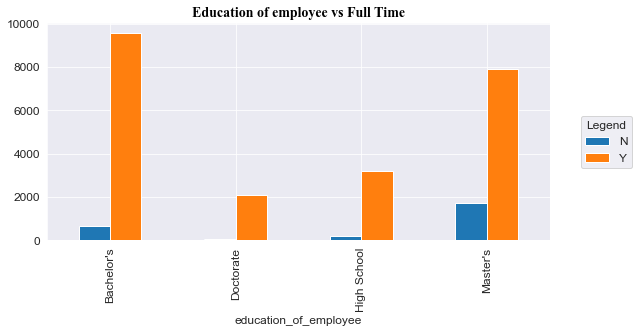

<IPython.core.display.Javascript object>

In [551]:
plt.rc("font", size=12)
# plt.figure(figsize=(7, 5), dpi=160)
plt.rcParams["figure.figsize"] = (9, 4)
barplot = edu_FT.plot.bar(rot=90)
plt.title(
    "Education of employee vs Full Time",
    fontsize=14,
    fontweight="bold",
    fontname="Times New Roman",
    color="black",
)
plt.xticks(rotation=90)

plt.legend(title="Legend", bbox_to_anchor=(1.05, 0.6), loc="upper left", fontsize=12)

#### education_of_employee vs requires_job_training

* Do those with higher education qualifications require less job training compared to those with less qualifications?

In [157]:
edu_need_for_train = pd.crosstab(
    data["education_of_employee"], data["requires_job_training"], margins=False
)
edu_FT

full_time_position,N,Y
education_of_employee,,
Bachelor's,683,9551
Doctorate,80,2112
High School,206,3214
Master's,1738,7896


<IPython.core.display.Javascript object>

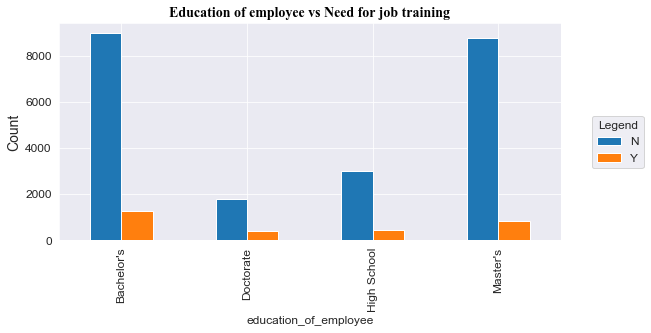

<IPython.core.display.Javascript object>

In [552]:
plt.rc("font", size=12)
plt.rcParams["figure.figsize"] = (9, 4)
barplot = edu_need_for_train.plot.bar(rot=90)
plt.ylabel("Count", fontsize=14)
plt.title(
    "Education of employee vs Need for job training",
    fontsize=14,
    fontweight="bold",
    fontname="Times New Roman",
    color="black",
)
plt.xticks(rotation=90)

plt.legend(title="Legend", bbox_to_anchor=(1.05, 0.6), loc="upper left", fontsize=12)

### Summary of Bivariate Data Analysis

* There seems to be no correlation beteen the various numerical variables

* **Europe** had the highest percentage of certified applications with approx. 20% denied while those from **South America** had the highest percentage of declined employees (approx. 42%)

* With reference to the level of education, employees with high school qualifications had the highest rate of decline (approx. 64%) while doctorate graduates had the lowest (approx. 15%)

* Those with previous work experience are likely to be certified (approx.75% chances) compared to those without (approx. 45% chances)

* Need for job training seems not to be a determinant for certification of an applicant since those who require training and those who don't have equal chances of getting certified. I also noted that the need for job training doesn't depend on the education elevel, since all the education levels require job training.

* Like need for job training, full time position also doesn't not determine certification

* Highest rate of decline was observed in the Islands region, with approx. 40% decline, while Midwest had the least (approx. 15%)

* Hourly job applications had the highest rate of decline with approx. 65%, while yearly had the lowest of approx. 30%

* Most employees in all the regions had Bachelor's as their highest level of education, while high school had the least.

* Most employees are paid on yearly basis and prefer full time jobs, level of education nothwithstanding


## Data Preprocessing

#### Checking for outliers

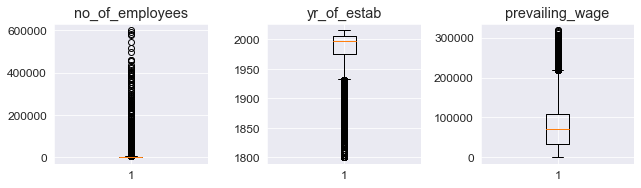

<IPython.core.display.Javascript object>

In [286]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 5, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All the numeric columns have outliers

In [318]:
df = data.drop("case_id", axis=1)

<IPython.core.display.Javascript object>

In [319]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.20290,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.65000,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.86000,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.03000,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.39000,Year,Y,Certified


<IPython.core.display.Javascript object>

In [320]:
# Encode categorical variables
replaceStruct = {
    "has_job_experience": {"N": 0, "Y": 1},
    "requires_job_training": {"N": 0, "Y": 1},
    "full_time_position": {"N": 0, "Y": 1},
    "case_status": {"Denied": 0, "Certified": 1},
}

df = df.replace(replaceStruct)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,0,0,14513,2007,West,592.20290,Hour,1,0
1,Asia,Master's,1,0,2412,2002,Northeast,83425.65000,Year,1,1
2,Asia,Bachelor's,0,1,44444,2008,West,122996.86000,Year,1,0
3,Asia,Bachelor's,0,0,98,1897,West,83434.03000,Year,1,0
4,Africa,Master's,1,0,1082,2005,South,149907.39000,Year,1,1


<IPython.core.display.Javascript object>

#### Create X and Y variables

In [332]:
X = df.drop("case_status", axis=1)
y = df["case_status"]

<IPython.core.display.Javascript object>

In [339]:
# Create dummy variables
X = pd.get_dummies(X, drop_first=True)

<IPython.core.display.Javascript object>

#### Split the data to Train and Test sets

In [340]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [341]:
# Check the shapes and percentage of classes in training and test sets
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1   0.66792
0   0.33208
Name: case_status, dtype: float64
Percentage of classes in test set:
1   0.66784
0   0.33216
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

* We have 17,836 observations in the train set and 7,644 in the test set

## Building bagging and boosting models

### Model Evaluation Criterion

* The purpose of the model is to predict whether a Visa application will get satisfied or not. However, the Model can make wrong predictions in the following cirscumstances:

    * The model predicts that a Visa application will be certified but gets denied
    
    * It predicts that a Visa application will be denied, while it actually gets certified
    
**Why are both of these of these circumstances in this model important?**

* If the model predicts that an application will not get satisfied but in actual sense it would get satisfied, it means the company would settle for another candidate who is less qualified.

* On the other hannd, if it makes a wrong prediction on the suitability of a candidate for visa while the candidate shouldn't be granted Visa, it may lead to less qualified candidates coming to the country


**How will I reduce the losses?**

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
* I will use balanced class weights so that model focuses equally on both classes.

### Creaing functions to create various metrics and confusion matrix

In [342]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    # Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Accuracy of the model
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    #f1 = f1_score(target, pred)  # to compute F1-score
    # Recall of the model
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    # Precision of the model
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

In [343]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [349]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Decision Tree Model

In [347]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

**Check Model Performance on training set**

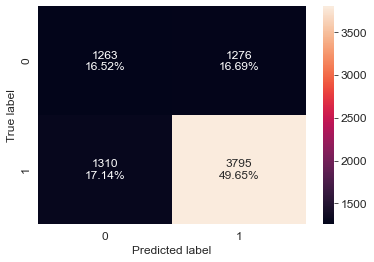

<IPython.core.display.Javascript object>

In [355]:
confusion_matrix_sklearn(dtree, X_test, y_test)

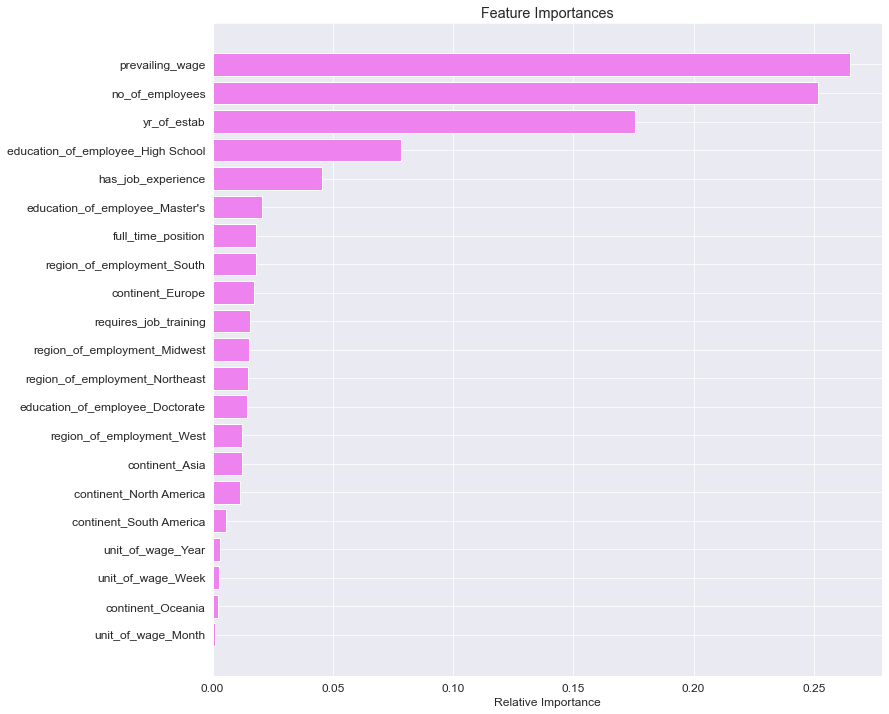

<IPython.core.display.Javascript object>

In [432]:
# Get the important variables
importances = dtree.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [501]:
dtree_train_perf = model_performance_classification_sklearn(dtree, X_train, y_train)
dtree_train_perf

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


<IPython.core.display.Javascript object>

In [503]:
dtree_test_perf = model_performance_classification_sklearn(dtree, X_test, y_test)
dtree_test_perf

,Accuracy,Recall,Precision,F1
0,0.66170,0.74339,0.74837,0.74587


<IPython.core.display.Javascript object>

#### Insights:

* The model overfits on training data as the train accuraxcy and recall are much higher than test accuracy and recall

* The Model predicts the applications that will be certified more than those that will not as per the confusion matrix

* The model identifies all the variables as important in determining whether an aapplication will be certified, with `prevailing_wage` and `number_of_employees` as the most important variable and `unit_of_wage_Month` as the least important.

##  Tuning the hyperparameters to improve the model performance

In [440]:
# Select the type of classifier
dtree_tuned = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
dtree_scorer_tuned = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=dtree_scorer_tuned, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Find the best algorithm to the data
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

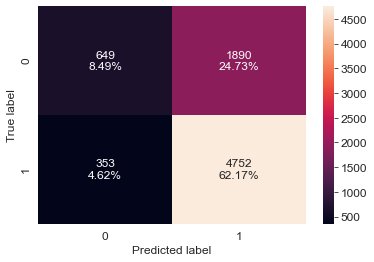

<IPython.core.display.Javascript object>

In [434]:
confusion_matrix_sklearn(dtree_tuned, X_test, y_test)

In [504]:
dtree_tuned_train_perf = model_performance_classification_sklearn(
    dtree_tuned, X_train, y_train
)
dtree_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.71255,0.93192,0.72007,0.81241


<IPython.core.display.Javascript object>

In [506]:
dtree_tuned_test_perf = model_performance_classification_sklearn(
    dtree_tuned, X_test, y_test
)
dtree_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.70657,0.93085,0.71545,0.80906


<IPython.core.display.Javascript object>

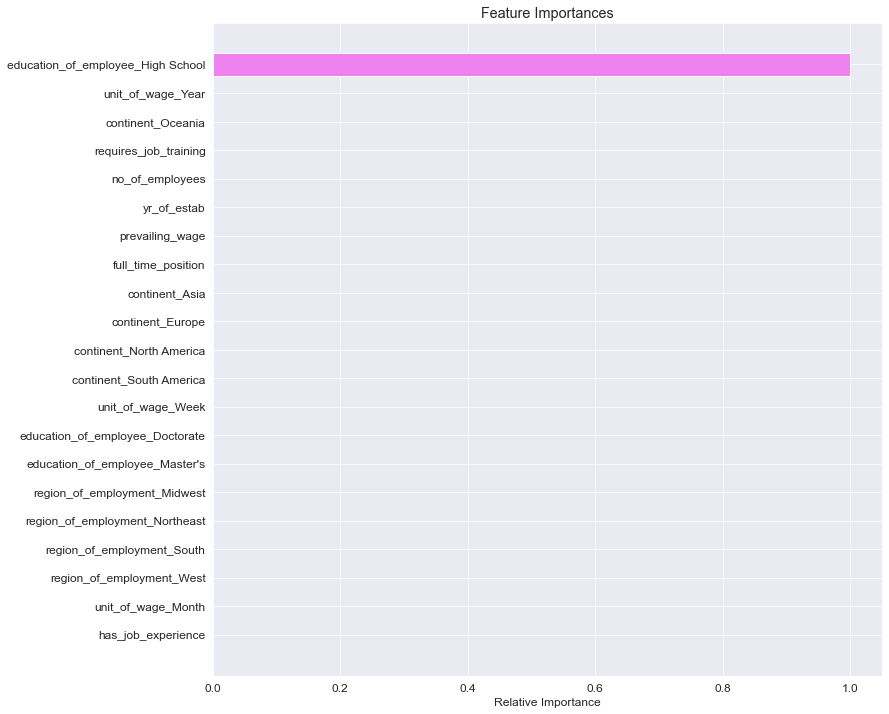

<IPython.core.display.Javascript object>

In [507]:
# Get the important variables
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Insights:

* Model performance has increased, as the ability to predict true positives has improved significantly

* Recall has also improved on test set

* The model identifies only `education_of_employee_High_Scool` as the only important variable

#### Bagging Classifier

In [370]:
# base_estimator for bagging classifier is a decision tree by default
bc = BaggingClassifier(random_state=1)
bc.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

**Checking Model Performance**

In [508]:
bc_train_perf = model_performance_classification_sklearn(bc, X_train, y_train)
bc_train_perf

,Accuracy,Recall,Precision,F1
0,0.98537,0.98607,0.99198,0.98901


<IPython.core.display.Javascript object>

In [510]:
bc_test_perf = model_performance_classification_sklearn(bc, X_test, y_test)
bc_test_perf

,Accuracy,Recall,Precision,F1
0,0.69571,0.76709,0.77499,0.77102


<IPython.core.display.Javascript object>

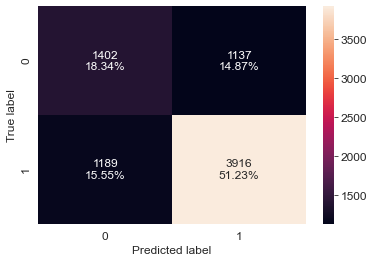

<IPython.core.display.Javascript object>

In [376]:
confusion_matrix_sklearn(bc, X_test, y_test)

* The bagging classifier is overfitting on training set
* It performs slightly better than the decision tree with default parameters in terms of predicting whether a visa application will the certified or not


#### Hyperparameter Tuning - Bagging Classifier

In [446]:
# Choose the type of classifier
bc_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
bc_tuned_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bc_tuned, parameters, scoring=bc_tuned_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bc_tuned = grid_obj.best_estimator_

# Find the best algorithm to the data
bc_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=90,
                  random_state=1)

<IPython.core.display.Javascript object>

**Checking Model Performance**

In [511]:
bc_tuned_train_perf = model_performance_classification_sklearn(
    bc_tuned, X_train, y_train
)
bc_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.99585,0.99958,0.99424,0.99690


<IPython.core.display.Javascript object>

In [513]:
bc_tuned_test_perf = model_performance_classification_sklearn(bc_tuned, X_test, y_test)
bc_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.72959,0.88834,0.75182,0.81440


<IPython.core.display.Javascript object>

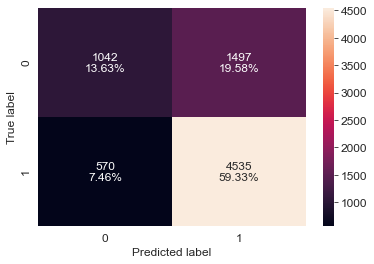

<IPython.core.display.Javascript object>

In [387]:
confusion_matrix_sklearn(bc_tuned, X_test, y_test)

#### Insights:

* The bagging classifier with tuned parameters has a better performance than the one with default parameters

* From the confusion matrix, there is a slight performance improvement in terms of predicting TP

### Random Forest

In [388]:
rnd_clf = RandomForestClassifier(random_state=1, class_weight="balanced")
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

**Checking Model Performance**

In [514]:
rnd_clf_train_perf = model_performance_classification_sklearn(rnd_clf, X_train, y_train)
rnd_clf_train_perf

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


<IPython.core.display.Javascript object>

In [515]:
rnd_clf_test_perf = model_performance_classification_sklearn(rnd_clf, X_test, y_test)
rnd_clf_test_perf

,Accuracy,Recall,Precision,F1
0,0.72318,0.84368,0.76569,0.80280


<IPython.core.display.Javascript object>

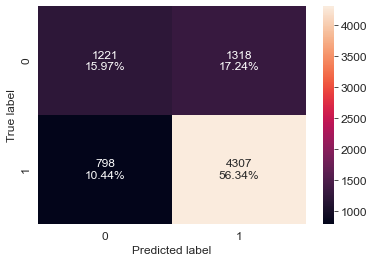

<IPython.core.display.Javascript object>

In [391]:
confusion_matrix_sklearn(rnd_clf, X_test, y_test)

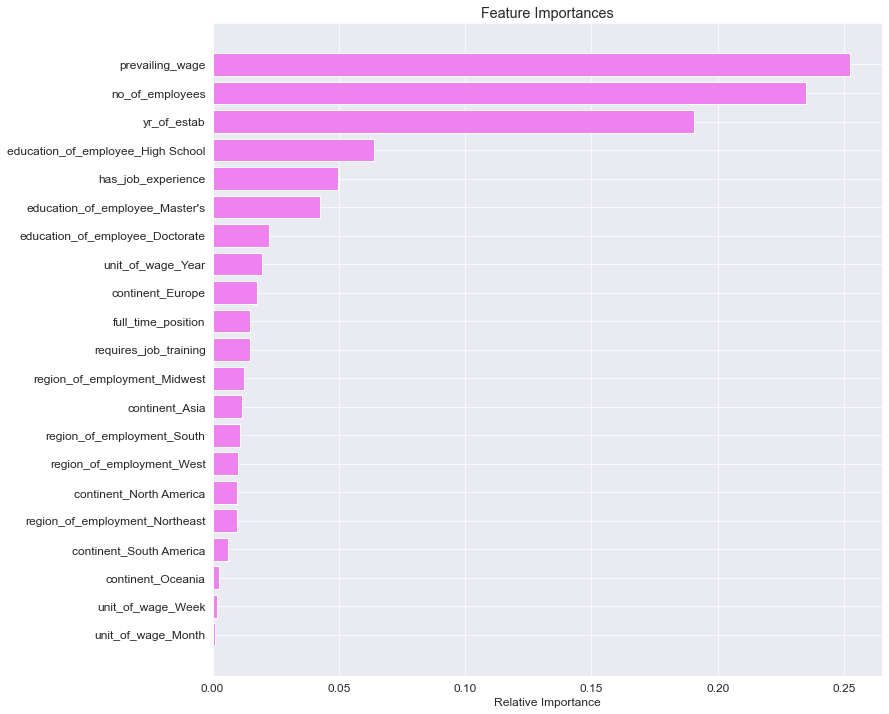

<IPython.core.display.Javascript object>

In [443]:
# Get the important variables
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Random Forest is overfiting on the training set since there is a big difference between the train and test recall values

* The model identifies `prevailing_wage` and `no_of_employees` as the most important variables and `unit_of_wage_month` as the least important.

#### Hyperparameter tuned Random Forest

In [447]:
#Select the classifier
rnd_clf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

#Define the parameters
parameters={
    "max_depth":list(np.arange(5,15,5)),
    "max_features":["sqrt","log2"],
    "min_samples_split":[5,7],
    "n_estimators":np.arange(15,26,5),
}

# Type of scoring used to compare parameter combinations
rnd_clf_tuned_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rnd_clf_tuned, parameters, scoring=rnd_clf_tuned_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rnd_clf_tuned = grid_obj.best_estimator_

# Find the best algorithm to the data
rnd_clf_tuned.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=25, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

**Checking Model Performance**

In [517]:
# Perfomance on Train set
rnd_clf_tuned_train_perf = model_performance_classification_sklearn(
    rnd_clf_tuned, X_train, y_train
)
rnd_clf_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.77170,0.90607,0.78519,0.84131


<IPython.core.display.Javascript object>

In [518]:
# Performance on test set
rnd_clf_tuned_test_perf = model_performance_classification_sklearn(
    rnd_clf_tuned, X_test, y_test
)
rnd_clf_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.74110,0.88364,0.76509,0.82011


<IPython.core.display.Javascript object>

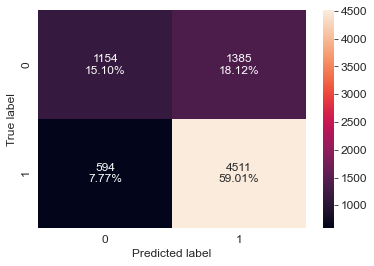

<IPython.core.display.Javascript object>

In [402]:
confusion_matrix_sklearn(rnd_clf_tuned, X_test, y_test)

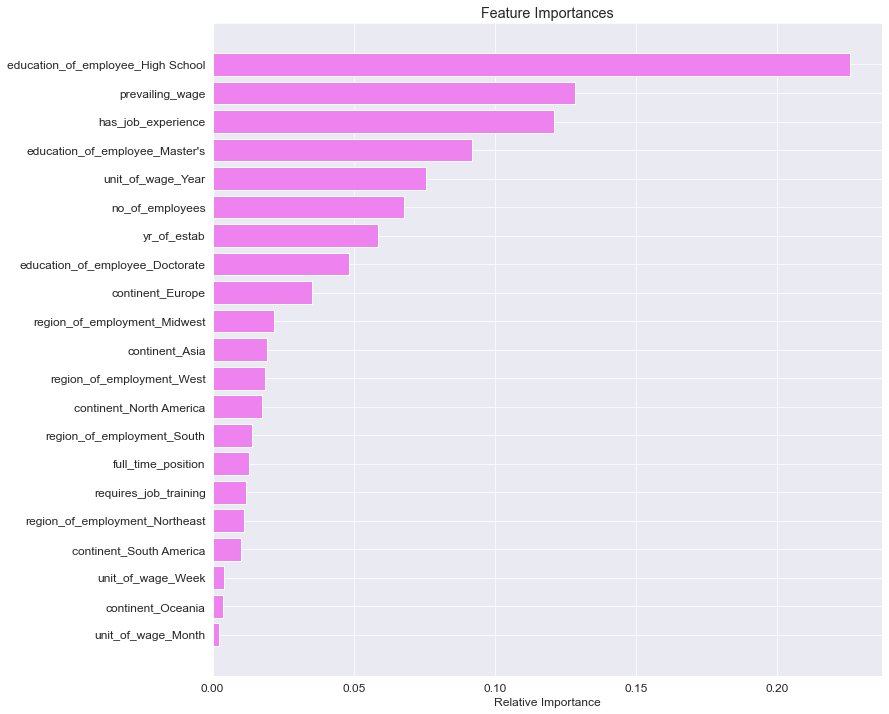

<IPython.core.display.Javascript object>

In [452]:
# Get the important variables
importances = rnd_clf_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The tuned Random Forest model doesn't overfit since the recall of the test is close to that of the train data set
* There is a slight improvement in the ability to predict TP

* FN has reduced slightly, while FP has slightly increased

* The model identifies all the variables as important, with `education_of_employee_High_School` and `prevailing_wage` as the most important and `unit_of_wage_month` as the least important.

### AdaBoost Classifier

In [405]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Model Performance On Test and Train data

In [519]:
abc_train_perf = model_performance_classification_sklearn(abc, X_train, y_train)
abc_train_perf

,Accuracy,Recall,Precision,F1
0,0.73806,0.88743,0.76041,0.81903


<IPython.core.display.Javascript object>

In [520]:
abc_test_perf = model_performance_classification_sklearn(abc, X_test, y_test)
abc_test_perf

,Accuracy,Recall,Precision,F1
0,0.73299,0.88501,0.75653,0.81574


<IPython.core.display.Javascript object>

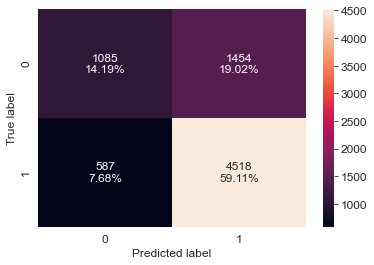

<IPython.core.display.Javascript object>

In [408]:
confusion_matrix_sklearn(abc, X_test, y_test)

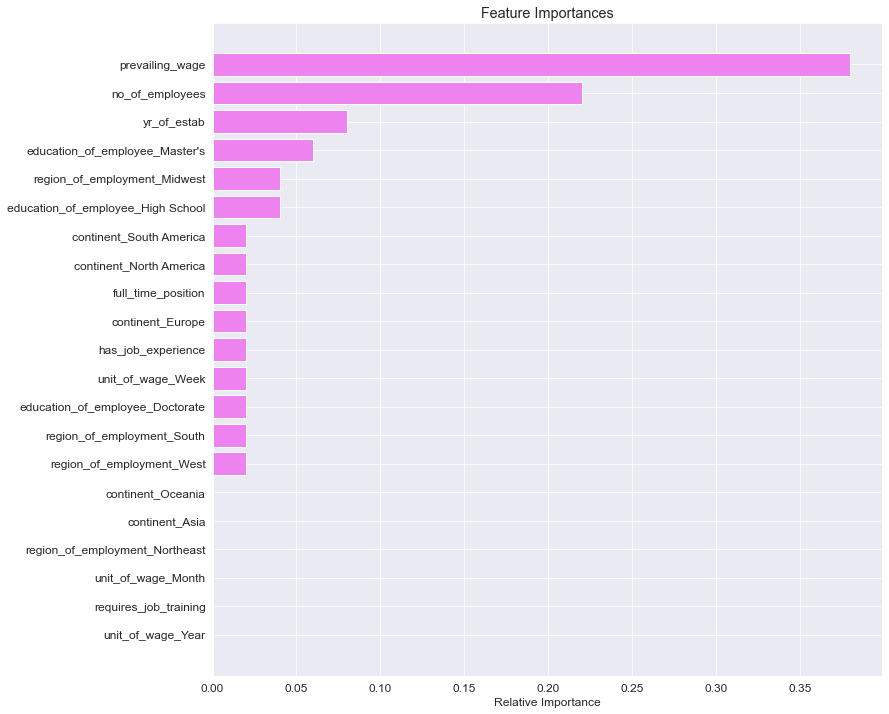

<IPython.core.display.Javascript object>

In [453]:
importances = abc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* This model doesn't overfit the training data
* It has the the best performance among the models with default parameters
* Among the important variables, the identifies `prevailing_wage` and `no_of_employees` as the most important variables in determining whether an application will be certified or denied and `region_of_employment` as the least. 

### Hyperparameter tuned AdaBoostClassifier

In [448]:
abc_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of score used to compare parameter combinations
abc_tuned_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search

grid_obj = GridSearchCV(abc_tuned, parameters, scoring=abc_tuned_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters

abc_tuned = grid_obj.best_estimator_

# fit the best algorithm to the data
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

<IPython.core.display.Javascript object>

#### Tuned-AdaBoostClassifier Model Performance On Test and Train data

In [521]:
abc_tuned_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
abc_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.75314,0.88819,0.77505,0.82777


<IPython.core.display.Javascript object>

In [523]:
abc_tuned_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)

abc_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.74084,0.88188,0.76565,0.81966


<IPython.core.display.Javascript object>

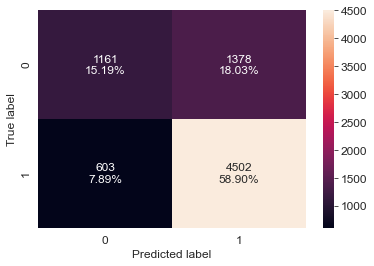

<IPython.core.display.Javascript object>

In [457]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

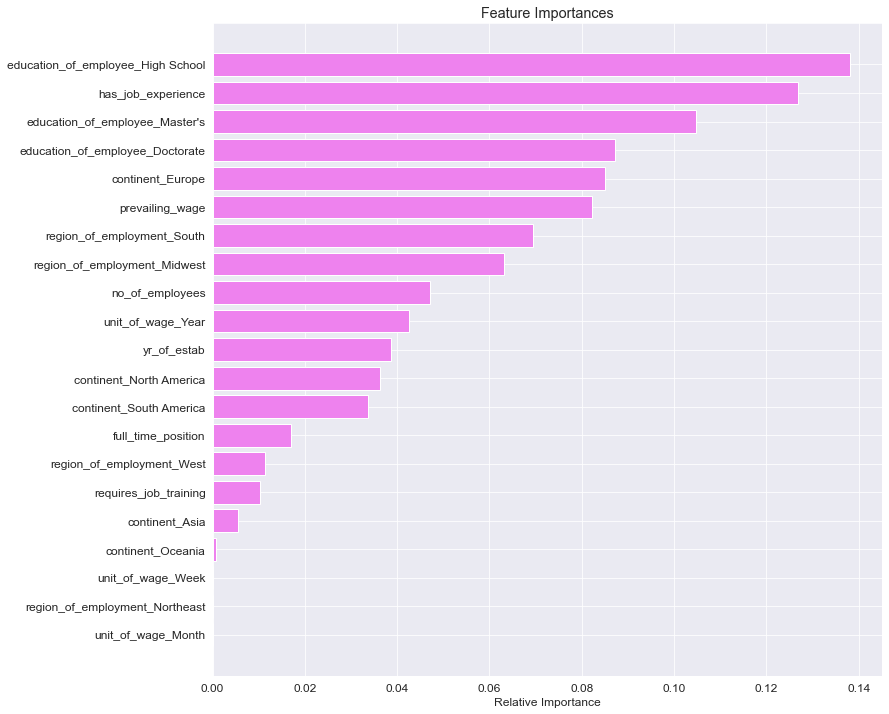

<IPython.core.display.Javascript object>

In [458]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The model doesn't have much improvement on the recall from AdaBoost classifier with default parameters

* It however identifies `education_of_employee_High_School` and `has_job_experience` as the most important variables and `continent_Oceania` as the least among important variables

### Gradient Boosting Classifier

In [459]:
gbc = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

<IPython.core.display.Javascript object>

#### Gradient Boosting Classifier Model Performance On Test and Train data

In [524]:
gbc_train_perf = model_performance_classification_sklearn(gbc, X_train, y_train)
gbc_train_perf

,Accuracy,Recall,Precision,F1
0,0.75841,0.88248,0.78327,0.82992


<IPython.core.display.Javascript object>

In [525]:
gbc_test_perf = model_performance_classification_sklearn(gbc, X_test, y_test)
gbc_test_perf

,Accuracy,Recall,Precision,F1
0,0.74555,0.87502,0.77364,0.82122


<IPython.core.display.Javascript object>

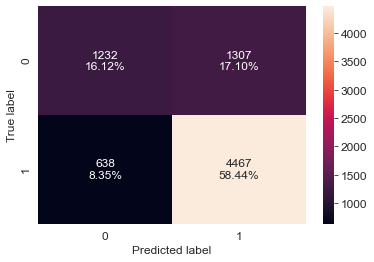

<IPython.core.display.Javascript object>

In [462]:
confusion_matrix_sklearn(gbc, X_test, y_test)

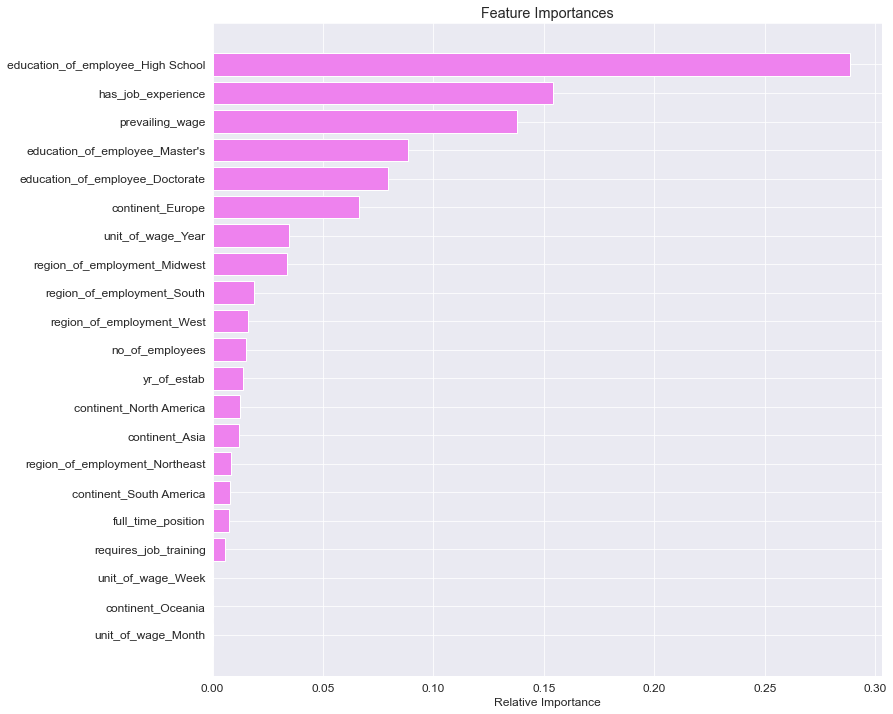

<IPython.core.display.Javascript object>

In [463]:
# Get the important variables
importances = gbc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The model is not overfitting as the test set and train set have close recall values
* The performance is close to that of the previous models
* The model maintains `education_of_employee_High_School` and `has_job_experience` as the most important variables but `requires_job_training` as the least among important variables

### Hyperparameter tuned Gradient Boosting Classifier

In [449]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
gbc_tuned_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=gbc_tuned_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=0.8)

<IPython.core.display.Javascript object>

#### Tuned-Gradient Boosting Classifier Model Performance On Test and Train data

In [526]:
gbc_tuned_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
gbc_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.74428,0.90036,0.76071,0.82466


<IPython.core.display.Javascript object>

In [527]:
gbc_tuned_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
gbc_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.73378,0.89226,0.75414,0.81741


<IPython.core.display.Javascript object>

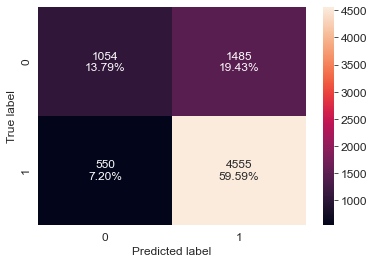

<IPython.core.display.Javascript object>

In [467]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

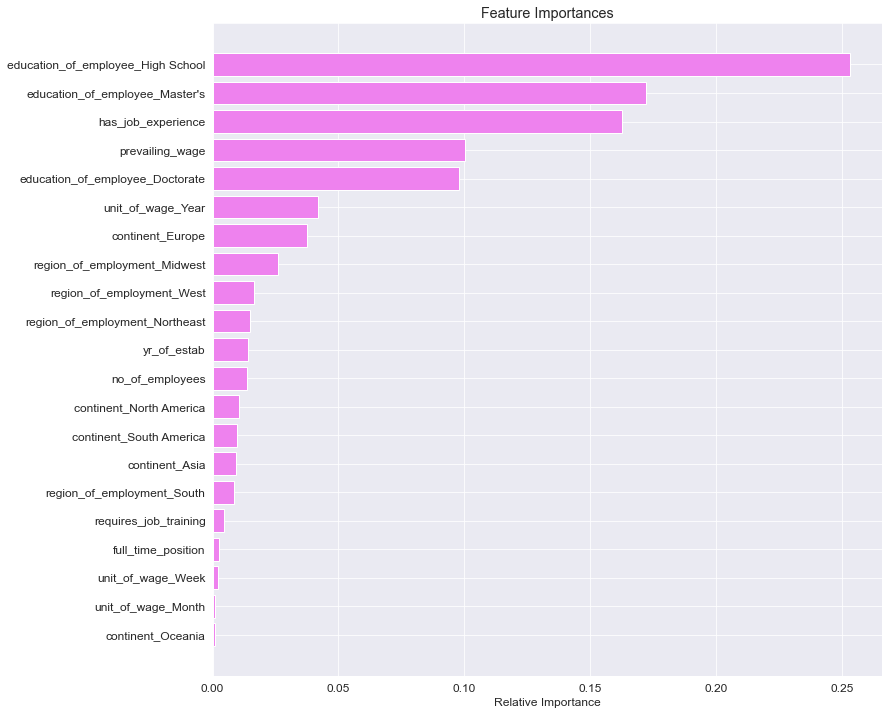

<IPython.core.display.Javascript object>

In [468]:
# Get the important variables
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* There is a slight improvement of the train and test recall values.

* The model doesn't overfit on train set since the recall value is close to that of test set

* The model maintains `education_of_employee_High_School` as the most important variable, followed by `education_of_employee_Master's` while `continent_Oceania` as the least.

* Also interesting to note the model identifies all the variables as important

### XGBoost Classifier

In [469]:
xgbc = XGBClassifier(random_state=1, eval_metric="logloss")
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

#### Performance of XGBoost Classifier

In [528]:
xgbc_train_perf = model_performance_classification_sklearn(xgbc, X_train, y_train)
xgbc_train_perf

,Accuracy,Recall,Precision,F1
0,0.83825,0.93100,0.84317,0.88491


<IPython.core.display.Javascript object>

In [529]:
xgbc_test_perf = model_performance_classification_sklearn(xgbc, X_test, y_test)
xgbc_test_perf

,Accuracy,Recall,Precision,F1
0,0.73535,0.86327,0.76884,0.81332


<IPython.core.display.Javascript object>

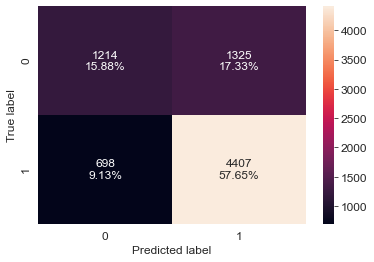

<IPython.core.display.Javascript object>

In [473]:
confusion_matrix_sklearn(xgbc, X_test, y_test)

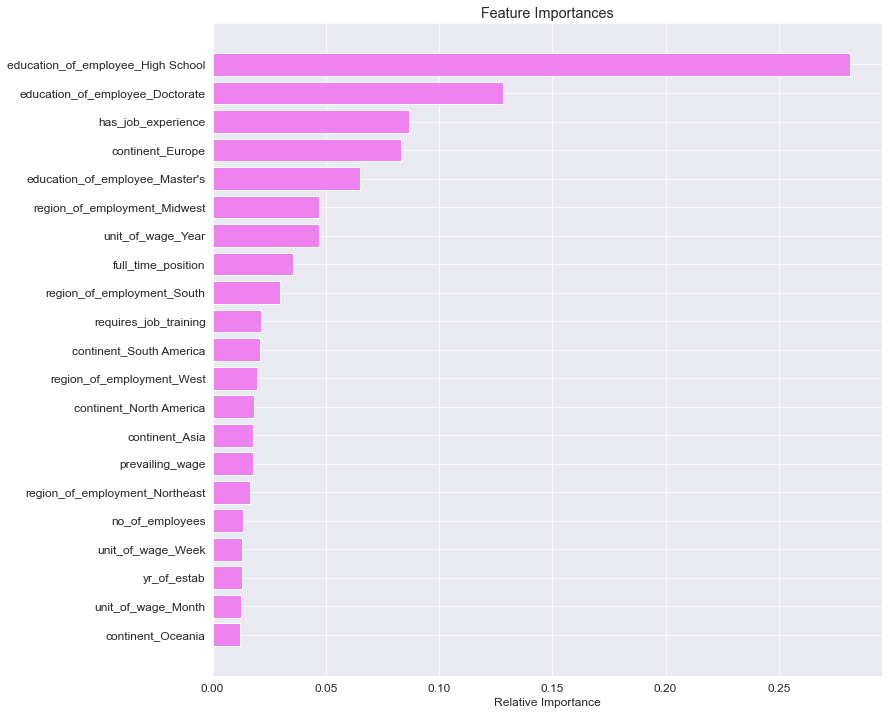

<IPython.core.display.Javascript object>

In [474]:
# Get the important variables
importances = xgbc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The model has an improved recall on train while that of test has reduced, implying it is slightly overfitting

* The model maintaains `education_of_employee_High_School` as the most important variable and `continent_Oceania` as the least.

### Tuned XGBoost Classifier

In [476]:
# Choose the type of classifier. 
xgbc_tuned = XGBClassifier(random_state=1,eval_metric='logloss')
# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
xgbc_tuned_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgbc_tuned, parameters,scoring=xgbc_tuned_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgbc_tuned.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

<IPython.core.display.Javascript object>

#### Performance of Tuned XGBoost Classifier

In [496]:
xgbc_tuned_train_perf = model_performance_classification_sklearn(
    xgbc_tuned, X_train, y_train
)
xgbc_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.66809,1.00000,0.66803,0.80098


<IPython.core.display.Javascript object>

In [497]:
xgbc_tuned_test_perf = model_performance_classification_sklearn(
    xgbc_tuned, X_test, y_test
)
xgbc_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.66771,0.99980,0.66780,0.80075


<IPython.core.display.Javascript object>

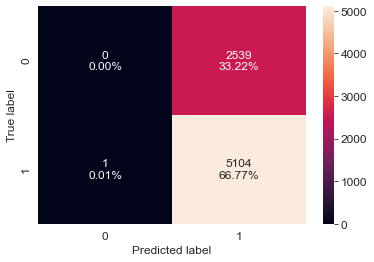

<IPython.core.display.Javascript object>

In [479]:
confusion_matrix_sklearn(xgbc_tuned, X_test, y_test)

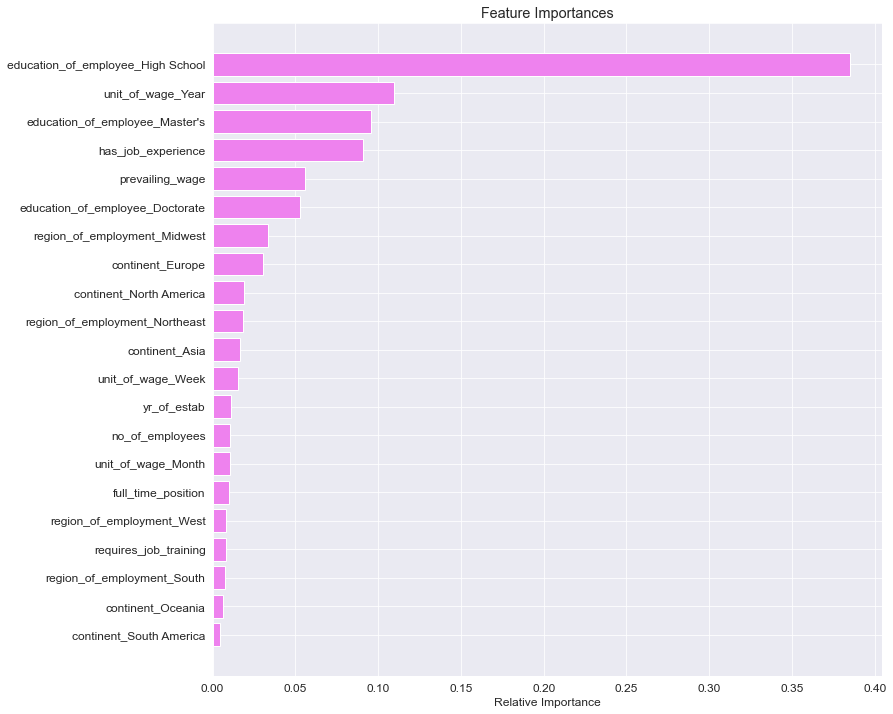

<IPython.core.display.Javascript object>

In [480]:
# Get the important variables
importances = xgbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* This model has the highest recall score for both train and test data sets

* It has the highest % in identifying TP (Visa applications that are likely to be certified). It however has 0% in identifying those that will be declined.

* It has maintained `education_of_employee_High School` as the most important variable and `continent_South America` as the least important variable

### Stacking Classifier

In [484]:
estimators = [
    ("AdaBoost", abc),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rnd_clf_tuned),
]

final_estimator = xgbc_tuned

sc = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
sc.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=1,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=25,
                                                       oob_score=True,
                                                       random_sta...
                                 

<IPython.core.display.Javascript object>

#### Checking Stacking model performance

In [498]:
sc_score_train_perf = model_performance_classification_sklearn(sc, X_train, y_train)
sc_score_train_perf

,Accuracy,Recall,Precision,F1
0,0.67033,0.99882,0.66980,0.80187


<IPython.core.display.Javascript object>

In [499]:
sc_score_test_perf = model_performance_classification_sklearn(sc, X_test, y_test)
sc_score_test_perf

,Accuracy,Recall,Precision,F1
0,0.66902,0.99785,0.66912,0.80107


<IPython.core.display.Javascript object>

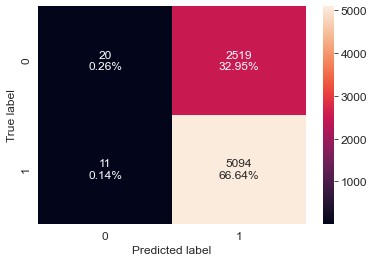

<IPython.core.display.Javascript object>

In [494]:
confusion_matrix_sklearn(sc, X_test, y_test)

* This model has the best performance since it has a higher % of identifying the applications which will be certified as well as those which will br declines

* It also has the highest recall on both test and train sets

## Model Performance Comparison and Conclusions

In [539]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_train_perf.T,
        dtree_tuned_train_perf.T,
        bc_train_perf.T,
        bc_tuned_train_perf.T,
        rnd_clf_train_perf.T,
        rnd_clf_tuned_train_perf.T,
        abc_train_perf.T,
        abc_tuned_train_perf.T,
        gbc_train_perf.T,
        gbc_tuned_train_perf.T,
        xgbc_train_perf.T,
        xgbc_tuned_train_perf.T,
        sc_score_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")

Training performance comparison:


<IPython.core.display.Javascript object>

In [ ]:
# training performance comparison
models_test_comp_df = pd.concat(
    [
        dtree_test_perf.T,
        dtree_tuned_test_perf.T,
        bc_test_perf.T,
        bc_tuned_test_perf.T,
        rnd_clf_test_perf.T,
        rnd_clf_tuned_test_perf.T,
        abc_test_perf.T,
        abc_tuned_test_perf.T,
        gbc_test_perf.T,
        gbc_tuned_test_perf.T,
        xgbc_test_perf.T,
        xgbc_tuned_test_perf.T,
        sc_score_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")


#### Train Performance Comparison

In [541]:
models_train_comp_df

,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.00000,0.71255,0.98537,0.99585,1.00000,0.77170,0.73806,0.75314,0.75841,0.74428,0.83825,0.66809,0.67033
Recall,1.00000,0.93192,0.98607,0.99958,1.00000,0.90607,0.88743,0.88819,0.88248,0.90036,0.93100,1.00000,0.99882
Precision,1.00000,0.72007,0.99198,0.99424,1.00000,0.78519,0.76041,0.77505,0.78327,0.76071,0.84317,0.66803,0.66980
F1,1.00000,0.81241,0.98901,0.99690,1.00000,0.84131,0.81903,0.82777,0.82992,0.82466,0.88491,0.80098,0.80187


<IPython.core.display.Javascript object>

#### Test Performance Comparison

In [540]:
models_test_comp_df

,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.66170,0.70657,0.69571,0.72959,0.72318,0.74110,0.73299,0.74084,0.74555,0.73378,0.73535,0.66771,0.66902
Recall,0.74339,0.93085,0.76709,0.88834,0.84368,0.88364,0.88501,0.88188,0.87502,0.89226,0.86327,0.99980,0.99785
Precision,0.74837,0.71545,0.77499,0.75182,0.76569,0.76509,0.75653,0.76565,0.77364,0.75414,0.76884,0.66780,0.66912
F1,0.74587,0.80906,0.77102,0.81440,0.80280,0.82011,0.81574,0.81966,0.82122,0.81741,0.81332,0.80075,0.80107


<IPython.core.display.Javascript object>

* My final model will be Stacking classifier model because it gives me the highest recall on both test and train set, and also doesn't overfit

* Tuned XGBoostClassifier model, Stacking classifier and Tuned GradientBoost classifier are the top models 

* I would have picked on Tuned XGBoostClassifier model, however, it doesn't identify the applications that are likely to be denied, a capability which is equally important

## Actionable Insights and Recommendations

* Office of Foreign Labor Certification (OFLC) can use this predictive model can use this model to determine if a Visa application will be certified based on the known applicant attributes.

* Europe had the highest percentage of certified applications with approx. 20% denied while those from South America had the highest percentage of declined employees (approx. 42%). 

* With reference to the level of education, employees with high school qualifications had the highest rate of decline (approx. 64%) while doctorate graduates had the lowest (approx. 15%)

* Those with previous work experience are likely to be certified (approx.75% chances) compared to those without (approx. 45% chances)

* Highest rate of decline was observed in the Islands region, with approx. 40% decline, while Midwest had the least (approx. 15%)

* Bachelor's degree is sufficient for certification for most jobs. Most employees in all the regions had Bachelor's as their highest level of education, while high school had the least.

* Applicants with at least yearly contracts stand better chances of being certified as per the data set. Most employees are paid on yearly basis and prefer full time jobs, level of education nothwithstanding.  Hourly job applications had the highest rate of decline with approx. 65%, while yearly had the lowest of approx. 30%. 

* Most models suggest that `education_of_employee_High Scool` is the most important feature in determining if a visa application will be certified or not.

* Generally, education andjob experience variables are important in determining whether visa application will be certified or denied, while continent variables are less important as per the models. 